In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

# correlatation

In [ ]:
N = 30

# correlated random var
x = np.linspace(0,10,N) + np.random.rand(N)
y = x + np.random.randn(N)

# setup figure
_, axs = plt.subplots(2, 2, figsize=(6,6))

def common_axs_setting(axs):
    axs.set_xlabel("Variable x")
    axs.set_ylabel("Variable y")
    axs.set_xticks([])
    axs.set_yticks([])
    axs.axis("square")

axs[0,0].plot(x, y, "ko")
axs[0,0].set_title("Positive correlation", fontweight="bold")
common_axs_setting(axs[0,0])

axs[0,1].plot(x, -y, "ko")
axs[0,1].set_title("negative correlation", fontweight="bold")
common_axs_setting(axs[0,1])

axs[1,0].plot(np.random.randn(N), np.random.randn(N), "ko")
axs[1,0].set_title('Zero correlation',fontweight='bold')
common_axs_setting(axs[1,0])

# /20 to scale down
x = np.cos(np.linspace(0, 2*np.pi, N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0, 2*np.pi, N)) + np.random.randn(N)/20
axs[1,1].plot(x, y, "ko")
axs[1,1].set_title('Zero correlation',fontweight='bold')
common_axs_setting(axs[1,1])

plt.tight_layout()
# plt.savefig('Figure_04_01.png',dpi=300) # write out the fig to a file
plt.show()

# Ex1

Write a Python function that takes two vectors as input and provides two numbers as output: the Pearson correlation coefficient and the cosine similarity value. Write code that follows the formulas presented in this chapter; don’t simply call `np.corrcoef` and `spatial.distance`.cosine.</br>
Check that the two output values are identical when the variables are already mean centered and different when the variables are not mean centered.

In [ ]:
def corrAndCos(x, y):
    """
    calcs cosine similarity and pearson corr.
    """
    # cosine similarity
    cos = np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y))
    
    # pearson corr.
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    num = np.dot(xm, ym)
    den = (np.linalg.norm(xm)*np.linalg.norm(ym)) 
    cor = num/den
    return cor, cos

a = np.random.randn(3)
b = np.random.randn(3)

cor, cos = corrAndCos(a, b)
np_ans = np.corrcoef(a, b)[0,1]
print(f"{cor = }\n{cos = }\n{np_ans = }")
assert round(cor, 3)==round(np_ans, 3)

In [ ]:
# compare r and c without mean-centering
a = np.random.randn(3) + 10
b = np.random.randn(3)

c = a - np.mean(a)
d = b - np.mean(b)

print(f"No mean center (should differ): {np.round(corrAndCos(a, b), 4)}")
print(f"With mean center (should be same): {np.round(corrAndCos(c, d), 4)}")
print("Note that the pearson. corr for both cases are the same.")

# Ex2

Create a variable containing the integers 0 through 3, and a second variable equaling the first variable plus some offset. 

You will then create a simulation in which you systematically vary that offset between −50 and +50 (that is, the first iteration of the simulation will have the second variable equal to [−50, −49, −48, −47]). 

In a for loop, compute the correlation and cosine similarity between the two variables and store these results. Then make a line plot showing how the correlation and cosine similarity are affected by the mean offset. 

In [ ]:
a = np.arange(4, dtype=int) # essentially one of the vector for calc correlation
offsets = np.arange(-50, 51)

results = np.zeros((len(offsets), 2))

In [ ]:
for i in range(len(offsets)):
    results[i,:] = corrAndCos(a, a+offsets[i]) 
    
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
# plt.savefig('Figure_04_02.png',dpi=300) # write out the fig to a file
plt.show()

# EX3

There are several Python functions to compute the Pearson correlation coefficient. One of them is called pearsonr and is located in the stats module of the SciPy library. Open the source code for this file (hint: ??functionname) and make sure you understand how the Python implementation maps onto the formulas introduced in this chapter

In [ ]:
from scipy.stats import pearsonr

??pearsonr

# Ex 4

Why do you ever need to code your own functions when they already exist in Python? Part of the reason is that writing your own functions has huge educational value, because you see that (in this case) the correlation is a simple computation and not some incredibly sophisticated black-box algorithm that only a computer-science PhD could understand. But another reason is that built-in functions are sometimes slower because of myriad input checks, dealing with additional input options, converting data types, etc. This increases usability but at the expense of computation time.

Your goal in this exercise is to determine whether your own bare-bones correlation function is faster than NumPy’s corrcoef function. Modify the function from Exercise 4-2 to compute only the correlation coefficient. Then, in a for loop over 1,000 iterations, generate two variables of 500 random numbers and compute the correlation between them. Time the for loop. Then repeat but using `np.corrcoef`. In my tests, the custom function was about 33% faster than np.corrcoef. In these toy examples, the differences are measured in milliseconds, but if you are running billions of correlations with large datasets, those milliseconds really add up! 

(Note that writing your own functions without input checks has the risk of input errors that would be caught by np.corrcoef.) (Also note that the speed advantage breaks down for larger vectors.)

In [ ]:
import time

def rho(x,y):
  xm = x-np.mean(x)
  ym = y-np.mean(y)
  n  = np.dot(xm,ym)
  d  = np.linalg.norm(xm) * np.linalg.norm(ym)
  return n/d


it = 1000
n = 500

tic = time.time()
for i in range(it):
  x = np.random.randn(n,2)
  rho(x[:,0], x[:,1])
t1 = time.time() - tic

tic = time.time()
for i in range(it):
  x = np.random.randn(n,2)
  pearsonr(x[:,0], x[:,1])
t2 = time.time() - tic

# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')

# Ex5

Let’s build an edge detector. The kernel for an edge detector is very simple: [−1 +1]. The dot product of that kernel with a snippet of a time series signal with constant value (e.g., [10 10]) is 0. But that dot product is large when the signal has a steep change (e.g., [1 10] would produce a dot product of 9). The signal we’ll work with is a plateau function. Graphs A and B in Figure 4-5 show the kernel and the signal. The first step in this exercise is to write code that creates these two time series.

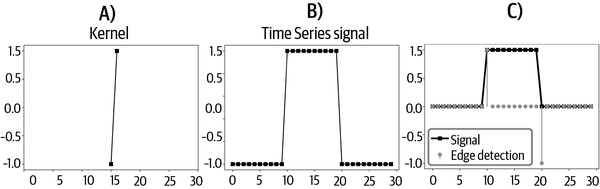

Next, write a for loop over the time points in the signal. At each time point, compute the dot product between the kernel and a segment of the time series data that has the same length as the kernel. You should produce a plot that looks like graph C in Figure 4-5. (Focus more on the result than on the aesthetics.) Notice that our edge detector returned 0 when the signal was flat, +1 when the signal jumped up, and −1 when the signal jumped down.

Feel free to continue exploring this code. For example, does anything change if you pad the kernel with zeros ([0 −1 1 0])? What about if you flip the kernel to be [1 −1]? How about if the kernel is asymmetric ([−1 2])?

In [ ]:
np.random.randn(5,2)

In [ ]:
for i in range(10):
    print(i)

for i in range(10):
    print(i)

In [ ]:
import numpy as np

In [ ]:
k = 3 # number of random cluster centroids

data = np.random.rand(150,2)
ridx = np.random.choice(range(len(data)), k, replace=False)
centroids = data[ridx, :]

print(f"{ridx = }\ncentroids:\n{centroids}")

In [ ]:
np.random.choice(range(len(data)), k, replace=False)

In [ ]:
dists = np.zeros((data.shape[0], k))
for ci in range(k):
    dists[:, ci] = np.sum((data-centroids[ci,:])**2, axis=1)

In [ ]:
groupidx = np.argmin(dists, axis=1)
print(f"{groupidx = }")

In [ ]:
for ki in range(k):
    centroids[ki, :] = [np.mean(data[groupidx==ki, 0]),
                        np.mean(data[groupidx==ki, 1])]

print(f"centroids\n{centroids}")

In [ ]:
np.sum((data[:, np.newaxis] - centroids) **2, axis=2)

In [ ]:
np.array([np.mean(data[groupidx==ki], axis=0) for ki in range(k)])